<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-rama/Excercises/Day-7/Etl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# A. Extract
# 1. Download or Create a Sample Data File
# Use any small public .csv (for demo, we’ll use a height/weight dataset):
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"
!wget -qO customers.csv $url


In [2]:
# 2. Load Into pandas DataFrame
import pandas as pd

df_customers = pd.read_csv('customers.csv')
print(df_customers.head())
print(df_customers.columns)

   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30
Index(['Index', ' Height(Inches)"', ' "Weight(Pounds)"'], dtype='object')


In [3]:
# B. Transform
# 1. Clean Data
# Remove duplicates

# Rename messy columns for cleaner analysis

# Remove duplicates based on 'Index' column
df_customers.drop_duplicates('Index', inplace=True)

# Clean up column names
df_customers.columns = [col.strip().replace('"', '').replace("'", "") for col in df_customers.columns]

# View cleaned DataFrame
print(df_customers.head())


   Index  Height(Inches)  Weight(Pounds)
0      1           65.78          112.99
1      2           71.52          136.49
2      3           69.40          153.03
3      4           68.22          142.34
4      5           67.79          144.30


In [4]:
# 2. Add Enriched & Derived Columns
# Compute a "BMI" (Body Mass Index) column

# Add a BMI column, Height in inches, Weight in pounds
df_customers['BMI'] = (df_customers['Weight(Pounds)'] / (df_customers['Height(Inches)'] * 0.0254) ** 2)
print(df_customers.head())

   Index  Height(Inches)  Weight(Pounds)        BMI
0      1           65.78          112.99  40.474812
1      2           71.52          136.49  41.359796
2      3           69.40          153.03  49.248182
3      4           68.22          142.34  47.406304
4      5           67.79          144.30  48.670704


In [5]:
# C. Load
# 1. Store the Result in a Local SQLite Database
import sqlite3

conn = sqlite3.connect('customers_etl_lab.db')
df_customers.to_sql('customers_etl', conn, if_exists='replace', index=False)


200

In [6]:
# 2. Run SQL Queries on the Transformed Data
# Example: Get customers with BMI > 25 (overweight threshold)
query = "SELECT * FROM customers_etl WHERE BMI > 45;"
df_overweight = pd.read_sql(query, conn)
print(df_overweight.head())


   Index  Height(Inches)  Weight(Pounds)        BMI
0      3           69.40          153.03  49.248182
1      4           68.22          142.34  47.406304
2      5           67.79          144.30  48.670704
3      7           69.80          141.49  45.013986
4     17           66.46          129.50  45.444535


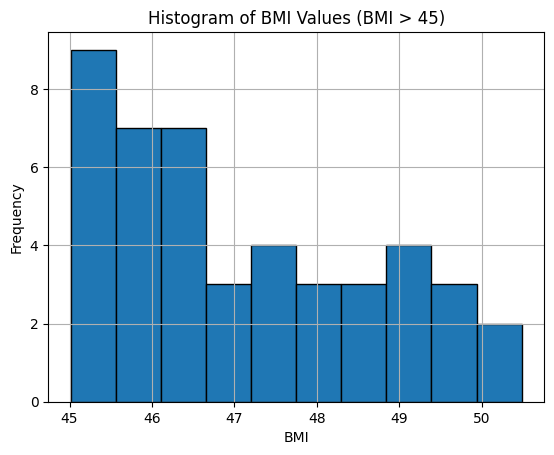

In [7]:
import matplotlib.pyplot as plt

# Plot histogram of BMI values
df_overweight['BMI'].hist(bins=10, edgecolor='black')
plt.title('Histogram of BMI Values (BMI > 45)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [8]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df_overweight['BMI_Category'] = df_overweight['BMI'].apply(categorize_bmi)
print(df_overweight[['BMI', 'BMI_Category']].head())


         BMI BMI_Category
0  49.248182        Obese
1  47.406304        Obese
2  48.670704        Obese
3  45.013986        Obese
4  45.444535        Obese


In [9]:
# Validate that all BMI values are positive
assert (df_overweight['BMI'] > 0).all(), "BMI values must be > 0"
